In [2]:
pip install mglearn

     |████████████████████████████████| 540 kB 7.9 MB/s eta 0:00:01
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=992c5172294fa3fdb4020316dce98b1461eef951c27a26c6dd86a4b943f5893e
  Stored in directory: /Users/choi/Library/Caches/pip/wheels/df/30/8a/1e2c8f144c9d411b0688f628d496d2db8f61b6d14bcedaa1df
Successfully built mglearn
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
import warnings

warnings.filterwarnings(action='ignore')

X.shape : (26, 2)


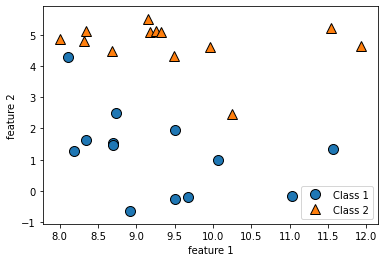

In [2]:
X, y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 1", 'Class 2'], loc=4)
plt.xlabel('feature 1')
plt.ylabel('feature 2')
print(f"X.shape : {X.shape}")

Text(0, 0.5, 'target')

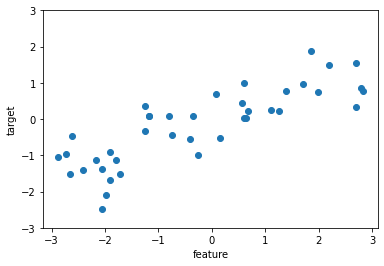

In [3]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel('feature')
plt.ylabel('target')

In [4]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(f"cancer.keys():\n {cancer.keys()}")

cancer.keys():
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [5]:
print(f"유방암 데이터의 형태 : {cancer.data.shape}")

유방암 데이터의 형태 : (569, 30)


In [6]:
print("클래스별 샘플 개수 : \n", {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

클래스별 샘플 개수 : 
 {'malignant': 212, 'benign': 357}


In [7]:
print(f"특성 이름 : \n {cancer.feature_names}")

특성 이름 : 
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [8]:
from sklearn.datasets import load_boston
boston = load_boston()
print(f"데이터의 형태 : {boston.data.shape}")

데이터의 형태 : (506, 13)


In [9]:
X, y = mglearn.datasets.load_extended_boston()
print(f"X.shape : {X.shape}")

X.shape : (506, 104)


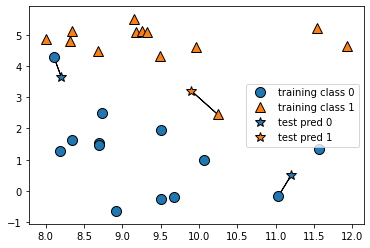

In [10]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

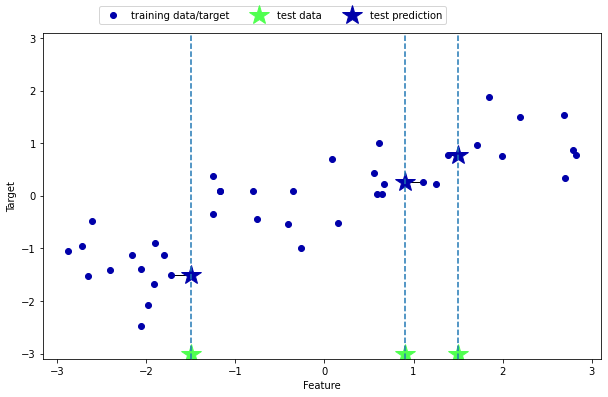

In [11]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

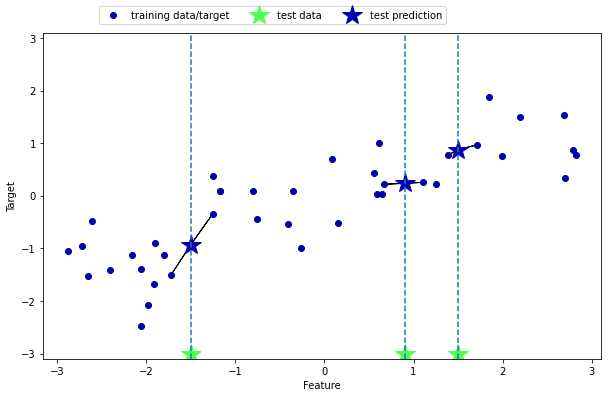

In [12]:
mglearn.plots.plot_knn_regression(n_neighbors=2)

In [17]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [19]:
print(f"테스트 세트 예측 : \n {reg.predict(X_test)}")

테스트 세트 예측 : 
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [24]:
print(f"테스트 세트 R^2 : {reg.score(X_test, y_test):.2f}")

테스트 세트 R^2 : 0.83


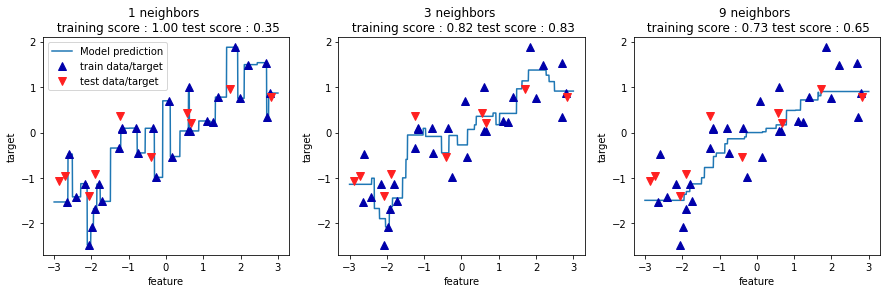

In [29]:
fig, axes = plt.subplots(1, 3, figsize=(15,4))
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title(f"{n_neighbors} neighbors \n training score : {reg.score(X_train, y_train):.2f} test score : {reg.score(X_test, y_test):.2f}")
    ax.set_xlabel("feature")
    ax.set_ylabel("target")
axes[0].legend(["Model prediction", "train data/target", "test data/target"], loc='best')

w[0]: 0.393906  b: -0.031804


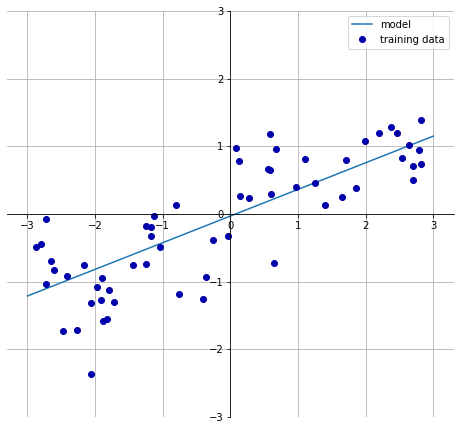

In [30]:
mglearn.plots.plot_linear_regression_wave()

In [34]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

In [38]:
print(f"lr.coef_ : {lr.coef_}")
print(f"lr.intercept_ : {lr.intercept_}")

lr.coef_ : [0.39390555]
lr.intercept_ : -0.031804343026759746


In [40]:
print(f"훈련 세트 점수 : {lr.score(X_train, y_train):.2f}")
print(f"테스트 세트 점수 : {lr.score(X_test, y_test):.2f}")

훈련 세트 점수 : 0.67
테스트 세트 점수 : 0.66


In [44]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [45]:
print(f"훈련 세트 점수 : {lr.score(X_train, y_train):.2f}")
print(f"테스트 세트 점수 : {lr.score(X_test, y_test):.2f}")

훈련 세트 점수 : 0.95
테스트 세트 점수 : 0.61
